In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [48]:
data = pd.read_csv('train.csv')

In [49]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [52]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [53]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[5 1 5 ... 6 6 7] [8 6 8 ... 4 7 0]
0.07848780487804878
Iteration:  10
[0 7 0 ... 6 6 0] [8 6 8 ... 4 7 0]
0.1858048780487805
Iteration:  20
[3 8 0 ... 0 0 0] [8 6 8 ... 4 7 0]
0.259609756097561
Iteration:  30
[3 8 5 ... 0 0 0] [8 6 8 ... 4 7 0]
0.3123658536585366
Iteration:  40
[3 8 5 ... 0 0 0] [8 6 8 ... 4 7 0]
0.38278048780487806
Iteration:  50
[8 8 8 ... 4 9 0] [8 6 8 ... 4 7 0]
0.4503170731707317
Iteration:  60
[8 8 8 ... 4 9 0] [8 6 8 ... 4 7 0]
0.4902682926829268
Iteration:  70
[8 8 8 ... 4 9 0] [8 6 8 ... 4 7 0]
0.5322682926829269
Iteration:  80
[8 8 8 ... 4 9 0] [8 6 8 ... 4 7 0]
0.566170731707317
Iteration:  90
[8 8 8 ... 4 7 0] [8 6 8 ... 4 7 0]
0.5937560975609756
Iteration:  100
[8 8 8 ... 4 7 0] [8 6 8 ... 4 7 0]
0.6178048780487805
Iteration:  110
[8 8 8 ... 4 7 0] [8 6 8 ... 4 7 0]
0.6400731707317073
Iteration:  120
[8 2 8 ... 4 7 0] [8 6 8 ... 4 7 0]
0.6575853658536586
Iteration:  130
[8 2 8 ... 4 7 0] [8 6 8 ... 4 7 0]
0.6749512195121952
Iteration:  140
[

In [54]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [8]
Label:  8


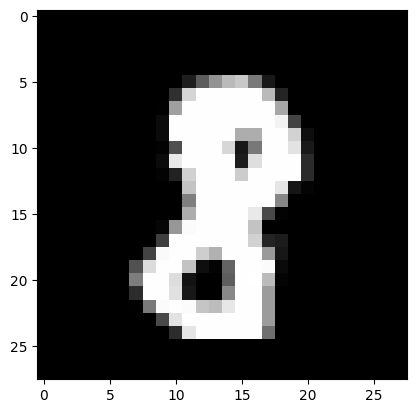

Prediction:  [2]
Label:  6


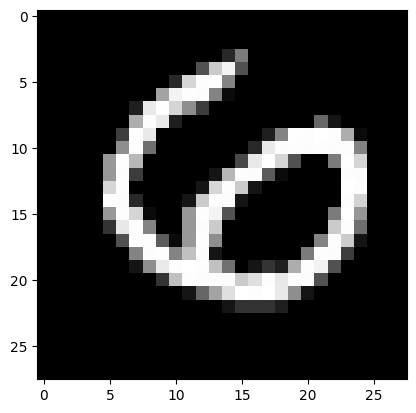

Prediction:  [8]
Label:  8


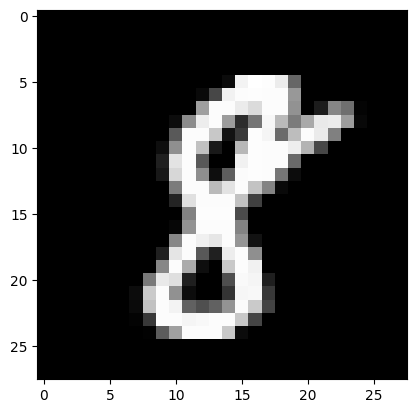

Prediction:  [2]
Label:  2


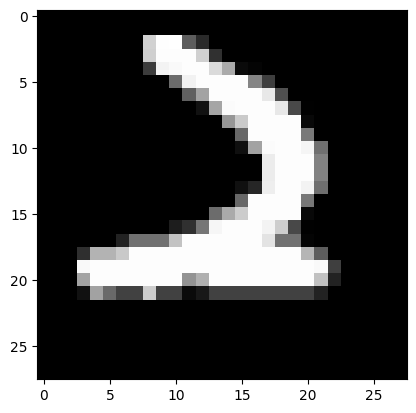

In [55]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [56]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 3 1 5 2 5 9 4 5 4 0 9 8 4 6 3 0 5 0 9 9 4 4 1 0 4 8 8 6 2 6 7 6 9 0 1 2
 8 0 1 0 1 8 4 9 3 3 3 0 5 0 4 0 9 4 4 5 7 7 1 7 8 3 9 8 5 8 6 3 7 7 5 6 8
 8 7 1 1 2 3 5 0 3 7 0 2 5 4 2 4 3 2 0 6 9 7 6 2 5 8 5 3 6 4 2 6 4 9 4 7 7
 8 5 5 9 4 8 5 4 8 4 1 5 9 0 4 4 1 9 3 7 7 4 3 0 1 2 8 0 4 7 9 7 0 9 4 1 5
 0 6 0 9 4 5 2 4 6 7 1 4 2 6 4 9 0 3 9 6 5 5 0 8 9 7 2 0 6 8 1 7 6 7 0 7 9
 1 8 0 2 0 0 8 7 9 5 3 8 6 6 5 0 1 4 3 7 6 0 0 8 5 6 8 9 0 5 0 4 5 0 3 6 5
 7 0 1 1 1 6 8 1 4 3 9 7 0 9 7 9 3 7 5 3 1 9 8 8 1 2 9 2 8 5 1 4 3 3 7 5 7
 1 1 6 1 3 1 1 9 6 5 9 6 2 4 1 4 5 6 5 2 8 0 7 1 1 9 2 3 2 6 4 5 3 1 8 6 4
 9 2 7 6 8 6 0 4 6 6 0 4 3 0 5 4 9 1 1 1 7 9 4 6 9 0 8 1 1 7 1 8 0 1 0 9 8
 6 1 5 0 5 9 8 0 5 7 0 4 9 8 1 3 4 7 1 5 9 4 4 0 0 2 7 0 0 8 6 3 4 3 3 7 4
 6 5 0 1 0 6 3 2 5 2 2 6 9 4 1 0 4 2 6 0 1 9 2 4 7 2 7 2 7 3 2 5 4 3 1 1 4
 1 9 8 2 1 4 3 2 3 5 3 3 2 3 1 1 1 1 8 1 1 7 3 2 3 6 4 1 0 5 3 7 6 7 0 6 2
 8 3 3 1 6 5 7 3 3 7 8 6 0 6 6 8 4 2 1 3 3 1 0 6 5 8 3 3 4 8 3 2 5 7 9 6 6
 2 2 8 1 1 6 8 5 4 4 9 9 

0.879